In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_pickle('E:/data_files/ppg_data/PPG_FieldStudy/processed_data_all_participants.pkl')
df.head(5)

,time_stamp[sec],user_id,activity_label,gt_heart_rate[BPM],skin_temp[C],EDA[microS],fft_N,fft_xf,BVP_powerSpect,ACC0_powerSpect,ACC1_powerSpect,ACC2_powerSpect
0,8.0,S1,0.0,49.611369,32.148125,4.716872,512,"[0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....","[3.3845378816808207, 3.38976858233557, 3.52446...","[2.562674132862977, 0.11143156956661938, -0.52...","[1.1527868740280884, 0.49716310471656544, 0.12...","[2.033443262692457, 0.9587489502954717, -0.741..."
1,10.0,S1,0.0,50.323992,32.148788,4.728222,512,"[0.0, 0.124755859375, 0.24951171875, 0.3742675...","[3.808383411435166, 4.4141701914009355, 3.0151...","[2.6222823617278266, 0.18563611962841808, -0.4...","[1.1803303061912271, 0.4308321382652773, 0.210...","[1.7456387682027168, 0.8206843400998957, 0.449..."
2,12.0,S1,0.0,52.708336,32.14697,4.739054,512,"[0.0, 0.124755859375, 0.24951171875, 0.3742675...","[0.7342695069401706, 4.209209912863593, 3.5781...","[2.6734746500403324, -0.24896037304427496, -0....","[1.2779290837408603, 0.41187321007690075, 0.01...","[1.3509071508955937, -0.19744507193934496, -0...."
3,14.0,S1,0.0,55.640794,32.144545,4.78867,512,"[0.0, 0.124755859375, 0.24951171875, 0.3742675...","[2.770051706946417, 4.174047012599668, 2.65538...","[2.5951888190615753, 0.8157803941949502, 0.627...","[1.5922120167574618, 1.0553402247077845, 0.721...","[1.3871223788226001, 0.037125024476421804, -0...."
4,16.0,S1,0.0,57.658406,32.143939,4.83025,512,"[0.0, 0.124755859375, 0.24951171875, 0.3742675...","[4.333172257340451, 4.684529918870272, 4.49636...","[2.502046403655502, 1.1114429814184918, 0.3677...","[1.5711258620389141, 1.2133099373393048, 0.999...","[1.7460670246045409, 0.8034598015137145, 0.323..."


In [3]:
df['user_id'].value_counts()

S10    5321
S7     4668
S5     4649
S1     4603
S4     4572
S13    4565
S11    4521
S14    4476
S3     4367
S9     4277
S2     4099
S8     4037
S15    3966
S12    3954
S6     2622
Name: user_id, dtype: int64

In [4]:
df['activity_label'].value_counts()

0.0    17495
6.0    13552
8.0     8502
5.0     6845
7.0     4697
1.0     4573
4.0     3479
2.0     3242
3.0     2312
Name: activity_label, dtype: int64

In [5]:
df['user_id'].value_counts(normalize=True)

S10    0.082245
S7     0.072152
S5     0.071858
S1     0.071147
S4     0.070668
S13    0.070560
S11    0.069880
S14    0.069184
S3     0.067499
S9     0.066108
S2     0.063357
S8     0.062399
S15    0.061301
S12    0.061116
S6     0.040527
Name: user_id, dtype: float64

In [6]:
df['activity_label'].value_counts(normalize=True)

0.0    0.270414
6.0    0.209469
8.0    0.131413
5.0    0.105801
7.0    0.072600
1.0    0.070683
4.0    0.053774
2.0    0.050111
3.0    0.035736
Name: activity_label, dtype: float64

In [7]:
X = df[['time_stamp[sec]','user_id','activity_label','skin_temp[C]','EDA[microS]','BVP_powerSpect','ACC0_powerSpect','ACC1_powerSpect','ACC2_powerSpect']]
X.head(1)

,time_stamp[sec],user_id,activity_label,skin_temp[C],EDA[microS],BVP_powerSpect,ACC0_powerSpect,ACC1_powerSpect,ACC2_powerSpect
0,8.0,S1,0.0,32.148125,4.716872,"[3.3845378816808207, 3.38976858233557, 3.52446...","[2.562674132862977, 0.11143156956661938, -0.52...","[1.1527868740280884, 0.49716310471656544, 0.12...","[2.033443262692457, 0.9587489502954717, -0.741..."


In [8]:
y = df['gt_heart_rate[BPM]'].astype('float32')
y.head(1)

0    49.61137
Name: gt_heart_rate[BPM], dtype: float32

In [9]:
y_for_splitting = X['user_id'].astype('str') + '_' + X['activity_label'].astype('int').astype('str')
y_for_splitting.head(1)

0    S1_0
dtype: object

# split out a testing set

use a concated version of the user_id and the activity id to split with the label (gt_hr) in the X then slicy y_train/test out of X verify that fractions of classes are ~ maintained.

In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.15, stratify=y_for_splitting)

In [19]:
X_train.shape

(54992, 9)

In [20]:
X_test.shape

(9705, 9)

In [13]:
df['user_id'].value_counts(normalize=True) - X_test['user_id'].value_counts(normalize=True)

S10    0.000019
S7     0.000024
S5     0.000039
S1    -0.000053
S4    -0.000017
S13    0.000081
S11    0.000019
S14   -0.000059
S3     0.000008
S9     0.000060
S2    -0.000116
S8     0.000060
S15    0.000096
S12   -0.000090
S6    -0.000070
Name: user_id, dtype: float64

In [14]:
df['activity_label'].value_counts(normalize=True) - X_test['activity_label'].value_counts(normalize=True)

0.0    0.000038
6.0   -0.000114
8.0    0.000037
5.0   -0.000021
7.0    0.000060
1.0   -0.000002
4.0   -0.000013
2.0    0.000136
3.0   -0.000122
Name: activity_label, dtype: float64

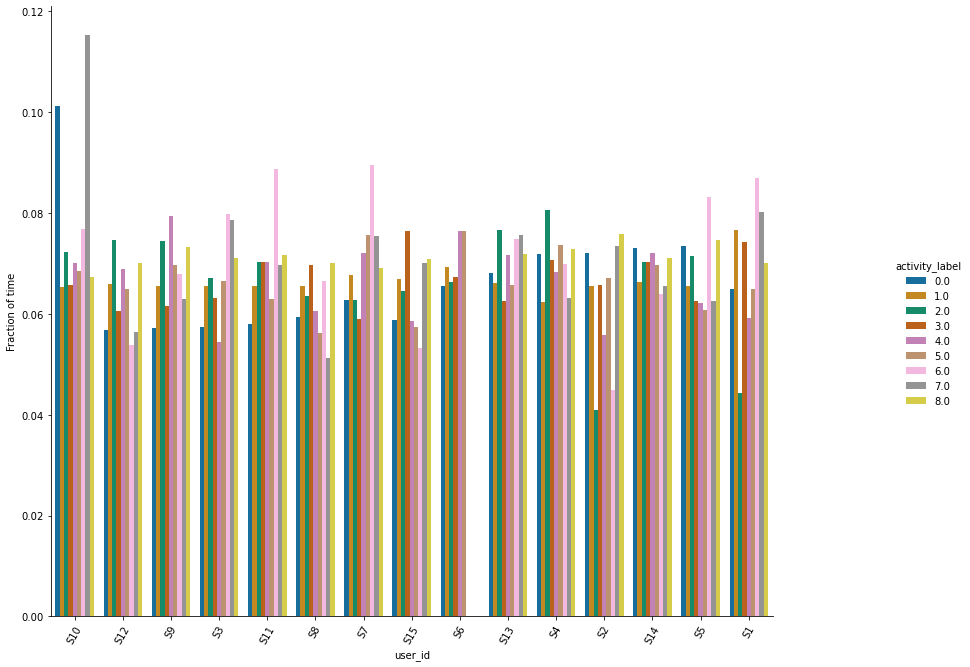

In [15]:
g_data = X_train\
            .groupby(['activity_label'])['user_id']\
            .apply(pd.Series.value_counts, normalize = True)\
            .rename('fraction')\
            .reset_index().rename(columns={'level_1':'user_id'})\
            .sort_values(by='activity_label',ascending = True)

g = sns.catplot(
                data = g_data
                ,x = 'user_id'
                ,y = 'fraction' 
                , kind = 'bar'
                , hue = 'activity_label'
                , palette = 'colorblind'
               )

g.fig.set_figwidth(15)
g.fig.set_figheight(10)
g.axes[0,0].set_xticklabels(g.axes[0,0].get_xticklabels(),rotation = 60)
g.axes[0,0].set_xlabel('user_id')
g.axes[0,0].set_ylabel('Fraction of time');

## determine scaling factors and scale X_train values
write custome function to scale X for modeling 
determine a average and std for each and apply standard scaling. scale BVP power spectra and ACC power sectra with two sets of mean and std (one for BVP and one for all ACC)

In [32]:
class ppg_scaler():
    temp_sp = ()
    eda_sp = ()
    bvp_sp = ()
    acc_sp = ()
    
    def fit(self,X):
        self.temp_sp = (X['skin_temp[C]'].min(), X['skin_temp[C]'].max())
        self.eda_sp = (X['EDA[microS]'].min(), X['EDA[microS]'].max())
        
        temp = np.concatenate(X['BVP_powerSpect'].values).ravel()
        self.bvp_sp = (temp.min(), temp.max())
        
        temp = np.concatenate(np.concatenate(X[['ACC0_powerSpect','ACC1_powerSpect','ACC2_powerSpect']].values)).ravel()
        self.acc_sp = (temp.min(), temp.max())    
    
    def transform(self,X):
        X_out = pd.DataFrame()
        X_out['skin_temp[C]'] = X['skin_temp[C]'].apply(lambda x: (x-self.temp_sp[0])/(self.temp_sp[1] - self.temp_sp[0]))
        
        X_out['EDA[microS]'] = X['EDA[microS]'].apply(lambda x: (x-self.eda_sp[0])/(self.eda_sp[1] - self.eda_sp[0]))
        
        X_out['BVP_powerSpect'] = X['BVP_powerSpect'].apply(lambda x: (x-self.bvp_sp[0])/(self.bvp_sp[1] - self.bvp_sp[0]))
        
        X_out[['ACC0_powerSpect','ACC1_powerSpect','ACC2_powerSpect']] = X[['ACC0_powerSpect','ACC1_powerSpect','ACC2_powerSpect']].apply(lambda x: (x-self.acc_sp[0])/(self.acc_sp[1] - self.acc_sp[0]))

        return X_out
    
    def fit_transform(self,X):
        self.fit(X)
        return self.transform(X)

need to put all the data into a single input matrix

In [ ]:
X_play = X_train.iloc[:10,:]
X_play.head(2)

In [ ]:
scaler = ppg_scaler()
X_play_s = scaler.fit_transform(X_play)
X_play_s.head(2)

##  pack all values into a NX5X65 np array padding with 0s if arays are not long enough

In [80]:
def prep_df_for_CNN(scaled_X_df):
    out_length = 65
    CNN_inp = np.zeros((5,65,1))
    for i_row in scaled_X_df.iterrows():
        temp_df = pd.DataFrame(np.zeros([1,out_length]))
        temp_df = pd.concat([temp_df, pd.DataFrame([i_row[1]['skin_temp[C]'], i_row[1]['EDA[microS]']]).T])
        temp_df = pd.concat([temp_df, pd.DataFrame(i_row[1]['BVP_powerSpect']).T])
        temp_df = pd.concat([temp_df, pd.DataFrame(i_row[1]['ACC0_powerSpect']).T])
        temp_df = pd.concat([temp_df, pd.DataFrame(i_row[1]['ACC1_powerSpect']).T])
        temp_df = pd.concat([temp_df, pd.DataFrame(i_row[1]['ACC2_powerSpect']).T])
        temp_df = temp_df.reset_index().drop(index=0).drop(columns='index').fillna(0)
        CNN_inp = np.dstack((CNN_inp, temp_df.values))
    
    CNN_inp = np.moveaxis(CNN_inp,2,0)[1:].astype('float32')
    CNN_inp = CNN_inp.reshape(CNN_inp.shape[0],CNN_inp.shape[1],CNN_inp.shape[2],1)
    return CNN_inp

In [ ]:
prep_df_for_CNN(X_play_s).shape

# split train set into learning and validation set

In [22]:
X_train.head(2)

,time_stamp[sec],user_id,activity_label,skin_temp[C],EDA[microS],BVP_powerSpect,ACC0_powerSpect,ACC1_powerSpect,ACC2_powerSpect
6240,3282.0,S2,5.0,34.374242,15.605393,"[2.988759333709491, 3.679659504345552, 4.18367...","[2.3799977126896366, 0.40713061365375547, 0.74...","[1.615257185105095, -0.3150333739468675, -1.54...","[2.3361328032381796, 0.40748680447049834, 0.60..."
24343,4114.0,S6,0.0,34.249394,15.769701,"[3.380150001233594, 4.686389456175176, 5.02992...","[2.5820556371900945, -0.5534034677818419, -1.8...","[1.7178098184572115, 0.361542535605853, -0.444...","[1.8769465046466782, -1.259115901479764, -1.25..."


In [23]:
y_for_splitting = X_train['user_id'].astype('str') + '_' + X_train['activity_label'].astype('int').astype('str')
y_for_splitting.head(1)

6240    S2_5
dtype: object

In [24]:
(X_learn, X_val, y_learn, y_val) = train_test_split(X_train, y_train, test_size=0.15, stratify=y_for_splitting)

In [26]:
X_train['user_id'].value_counts(normalize=True) - X_learn['user_id'].value_counts(normalize=True)

S10    0.000011
S7    -0.000026
S5     0.000004
S1     0.000004
S4    -0.000020
S13   -0.000004
S11   -0.000010
S14    0.000008
S3     0.000004
S9    -0.000009
S2     0.000011
S8     0.000004
S15    0.000004
S12    0.000021
S6    -0.000004
Name: user_id, dtype: float64

In [27]:
X_train['activity_label'].value_counts(normalize=True) - X_learn['activity_label'].value_counts(normalize=True)

0.0    2.772427e-05
6.0   -1.587168e-05
8.0   -1.631984e-06
5.0    2.735897e-05
7.0    7.589989e-07
1.0   -4.415927e-05
4.0    9.397037e-06
2.0    9.412598e-06
3.0   -1.298896e-05
Name: activity_label, dtype: float64

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54992 entries, 6240 to 64610
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time_stamp[sec]  54992 non-null  object
 1   user_id          54992 non-null  object
 2   activity_label   54992 non-null  object
 3   skin_temp[C]     54992 non-null  object
 4   EDA[microS]      54992 non-null  object
 5   BVP_powerSpect   54992 non-null  object
 6   ACC0_powerSpect  54992 non-null  object
 7   ACC1_powerSpect  54992 non-null  object
 8   ACC2_powerSpect  54992 non-null  object
dtypes: object(9)
memory usage: 4.2+ MB


# set up CNN

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

#check to make sure gpu is seen
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [45]:
tf.config.run_functions_eagerly(True)

In [184]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(5,65,1), kernel_size=(1, 3), padding='same', filters=9, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))
model.add(layers.Conv2D(kernel_size=(1,3), padding='same', filters=18, activation='relu'))
model.add(layers.MaxPool2D((1, 2), strides=(1,2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(5, activation='relu'))

model.add(layers.Dense(1, activation='linear'))

opt = Adam(lr=1e-3)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

In [33]:
scaler = ppg_scaler()
X_learn_in = prep_df_for_CNN(scaler.fit_transform(X_learn))

In [34]:
X_val_in = prep_df_for_CNN(scaler.transform(X_val))

In [185]:
history = model.fit(X_learn_in, y_learn, epochs=4000, validation_data=(X_val_in, y_val), batch_size = X_learn_in.shape[0]//5 )

C:\Users\PFCva\anaconda3\envs\ppg_model\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


Epoch 1/4000
6/6 [==============================] - 0s 40ms/step - loss: 8459.5635 - mae: 89.1010 - val_loss: 8417.3535 - val_mae: 88.8139
Epoch 2/4000
3/6 [==============>...............] - ETA: 0s - loss: 8348.4688 - mae: 88.4931

C:\Users\PFCva\anaconda3\envs\ppg_model\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3349: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


6/6 [==============================] - 0s 35ms/step - loss: 8328.4775 - mae: 88.3690 - val_loss: 8257.9688 - val_mae: 87.9225
Epoch 3/4000
6/6 [==============================] - 0s 37ms/step - loss: 8147.8750 - mae: 87.3417 - val_loss: 8023.7651 - val_mae: 86.5953
Epoch 4/4000
6/6 [==============================] - 0s 33ms/step - loss: 7889.0430 - mae: 85.8324 - val_loss: 7687.8813 - val_mae: 84.6550
Epoch 5/4000
6/6 [==============================] - 0s 33ms/step - loss: 7527.4756 - mae: 83.6417 - val_loss: 7221.1270 - val_mae: 81.8818
Epoch 6/4000
6/6 [==============================] - 0s 33ms/step - loss: 7040.9639 - mae: 80.5562 - val_loss: 6610.2529 - val_mae: 78.1033
Epoch 7/4000
6/6 [==============================] - 0s 34ms/step - loss: 6427.1470 - mae: 76.3606 - val_loss: 5841.2627 - val_mae: 73.0683
Epoch 8/4000
6/6 [==============================] - 0s 35ms/step - loss: 5686.8862 - mae: 70.6983 - val_loss: 4866.4604 - val_mae: 66.1386
Epoch 9/4000
6/6 [======================

Epoch 61/4000
6/6 [==============================] - 0s 37ms/step - loss: 3107.7043 - mae: 45.2509 - val_loss: 1101.4028 - val_mae: 26.1779
Epoch 62/4000
6/6 [==============================] - 0s 33ms/step - loss: 3084.7246 - mae: 44.9163 - val_loss: 1105.4210 - val_mae: 26.2481
Epoch 63/4000
6/6 [==============================] - 0s 34ms/step - loss: 3084.5491 - mae: 45.0535 - val_loss: 1238.1128 - val_mae: 28.4768
Epoch 64/4000
6/6 [==============================] - 0s 33ms/step - loss: 3068.7798 - mae: 45.0739 - val_loss: 1342.3518 - val_mae: 30.1534
Epoch 65/4000
6/6 [==============================] - 0s 36ms/step - loss: 3033.4543 - mae: 44.8748 - val_loss: 1357.6282 - val_mae: 30.3945
Epoch 66/4000
6/6 [==============================] - 0s 40ms/step - loss: 3087.2849 - mae: 45.2210 - val_loss: 1300.5908 - val_mae: 29.4944
Epoch 67/4000
6/6 [==============================] - 0s 33ms/step - loss: 3083.2708 - mae: 45.1236 - val_loss: 1163.8215 - val_mae: 27.2480
Epoch 68/4000
6/6 [=

6/6 [==============================] - 0s 37ms/step - loss: 3029.1570 - mae: 44.9481 - val_loss: 1279.7770 - val_mae: 29.2102
Epoch 120/4000
6/6 [==============================] - 0s 35ms/step - loss: 3034.6318 - mae: 44.7932 - val_loss: 1164.7280 - val_mae: 27.3123
Epoch 121/4000
6/6 [==============================] - 0s 32ms/step - loss: 3026.3101 - mae: 44.5396 - val_loss: 1175.6759 - val_mae: 27.4972
Epoch 122/4000
6/6 [==============================] - 0s 39ms/step - loss: 3046.2329 - mae: 44.8414 - val_loss: 1314.9681 - val_mae: 29.7760
Epoch 123/4000
6/6 [==============================] - 0s 32ms/step - loss: 3015.4529 - mae: 44.6665 - val_loss: 1304.1089 - val_mae: 29.6039
Epoch 124/4000
6/6 [==============================] - 0s 32ms/step - loss: 3039.3379 - mae: 44.9006 - val_loss: 1346.5286 - val_mae: 30.2754
Epoch 125/4000
6/6 [==============================] - 0s 41ms/step - loss: 3024.2854 - mae: 44.9000 - val_loss: 1332.4362 - val_mae: 30.0548
Epoch 126/4000
6/6 [========

Epoch 177/4000
6/6 [==============================] - 0s 33ms/step - loss: 3016.8740 - mae: 44.5115 - val_loss: 1194.3304 - val_mae: 27.8558
Epoch 178/4000
6/6 [==============================] - 0s 33ms/step - loss: 2996.8250 - mae: 44.5375 - val_loss: 1470.2803 - val_mae: 32.2132
Epoch 179/4000
6/6 [==============================] - 0s 34ms/step - loss: 2993.2839 - mae: 44.7152 - val_loss: 1460.4388 - val_mae: 32.0667
Epoch 180/4000
6/6 [==============================] - 0s 37ms/step - loss: 3019.6045 - mae: 44.8530 - val_loss: 1311.8853 - val_mae: 29.7753
Epoch 181/4000
6/6 [==============================] - 0s 37ms/step - loss: 2989.5903 - mae: 44.4518 - val_loss: 1200.7039 - val_mae: 27.9661
Epoch 182/4000
6/6 [==============================] - 0s 33ms/step - loss: 3006.5527 - mae: 44.5925 - val_loss: 1270.2577 - val_mae: 29.1104
Epoch 183/4000
6/6 [==============================] - 0s 34ms/step - loss: 2975.7268 - mae: 44.3200 - val_loss: 1267.8341 - val_mae: 29.0724
Epoch 184/400

6/6 [==============================] - 0s 39ms/step - loss: 2955.0210 - mae: 44.0392 - val_loss: 1233.9872 - val_mae: 28.5610
Epoch 236/4000
6/6 [==============================] - 0s 32ms/step - loss: 2954.4321 - mae: 44.2083 - val_loss: 1286.5214 - val_mae: 29.4151
Epoch 237/4000
6/6 [==============================] - 0s 31ms/step - loss: 2935.5713 - mae: 44.0762 - val_loss: 1368.1346 - val_mae: 30.7037
Epoch 238/4000
6/6 [==============================] - 0s 32ms/step - loss: 2941.5823 - mae: 44.1515 - val_loss: 1336.1875 - val_mae: 30.2051
Epoch 239/4000
6/6 [==============================] - 0s 31ms/step - loss: 2964.6663 - mae: 44.2811 - val_loss: 1288.0901 - val_mae: 29.4418
Epoch 240/4000
6/6 [==============================] - 0s 35ms/step - loss: 2946.7737 - mae: 44.1712 - val_loss: 1295.8920 - val_mae: 29.5674
Epoch 241/4000
6/6 [==============================] - 0s 37ms/step - loss: 2969.3252 - mae: 44.3432 - val_loss: 1211.3190 - val_mae: 28.1898
Epoch 242/4000
6/6 [========

6/6 [==============================] - 0s 32ms/step - loss: 2914.1257 - mae: 43.9381 - val_loss: 1206.3523 - val_mae: 28.1510
Epoch 294/4000
6/6 [==============================] - 0s 31ms/step - loss: 2883.1919 - mae: 43.6170 - val_loss: 1291.9410 - val_mae: 29.5485
Epoch 295/4000
6/6 [==============================] - 0s 31ms/step - loss: 2895.4043 - mae: 43.7756 - val_loss: 1393.7089 - val_mae: 31.1444
Epoch 296/4000
6/6 [==============================] - 0s 31ms/step - loss: 2933.9189 - mae: 44.1036 - val_loss: 1250.8185 - val_mae: 28.8852
Epoch 297/4000
6/6 [==============================] - 0s 32ms/step - loss: 2917.8169 - mae: 43.7463 - val_loss: 1084.3013 - val_mae: 26.0805
Epoch 298/4000
6/6 [==============================] - 0s 31ms/step - loss: 2921.5356 - mae: 43.6840 - val_loss: 1103.6705 - val_mae: 26.4157
Epoch 299/4000
6/6 [==============================] - 0s 30ms/step - loss: 2871.9189 - mae: 43.4655 - val_loss: 1288.1736 - val_mae: 29.4921
Epoch 300/4000
6/6 [========

6/6 [==============================] - 0s 31ms/step - loss: 2860.9312 - mae: 43.3746 - val_loss: 1164.2864 - val_mae: 27.4883
Epoch 352/4000
6/6 [==============================] - 0s 31ms/step - loss: 2833.6978 - mae: 43.2065 - val_loss: 1237.9104 - val_mae: 28.7153
Epoch 353/4000
6/6 [==============================] - 0s 31ms/step - loss: 2850.3147 - mae: 43.3015 - val_loss: 1212.3906 - val_mae: 28.2952
Epoch 354/4000
6/6 [==============================] - 0s 31ms/step - loss: 2853.1199 - mae: 43.3417 - val_loss: 1216.6270 - val_mae: 28.3667
Epoch 355/4000
6/6 [==============================] - 0s 31ms/step - loss: 2855.0051 - mae: 43.2622 - val_loss: 1181.8542 - val_mae: 27.7887
Epoch 356/4000
6/6 [==============================] - 0s 31ms/step - loss: 2852.5640 - mae: 43.4519 - val_loss: 1274.6927 - val_mae: 29.3179
Epoch 357/4000
6/6 [==============================] - 0s 31ms/step - loss: 2857.5081 - mae: 43.4516 - val_loss: 1328.7655 - val_mae: 30.1806
Epoch 358/4000
6/6 [========

6/6 [==============================] - 0s 32ms/step - loss: 2829.3755 - mae: 43.1837 - val_loss: 1217.9985 - val_mae: 28.4282
Epoch 410/4000
6/6 [==============================] - 0s 31ms/step - loss: 2774.3401 - mae: 42.7768 - val_loss: 1357.5123 - val_mae: 30.6663
Epoch 411/4000
6/6 [==============================] - 0s 31ms/step - loss: 2800.0095 - mae: 42.9936 - val_loss: 1336.3070 - val_mae: 30.3354
Epoch 412/4000
6/6 [==============================] - 0s 31ms/step - loss: 2825.4871 - mae: 43.1861 - val_loss: 1191.4470 - val_mae: 27.9891
Epoch 413/4000
6/6 [==============================] - 0s 32ms/step - loss: 2786.8787 - mae: 42.7751 - val_loss: 1125.7169 - val_mae: 26.8791
Epoch 414/4000
6/6 [==============================] - 0s 31ms/step - loss: 2798.9036 - mae: 42.8410 - val_loss: 1146.8167 - val_mae: 27.2404
Epoch 415/4000
6/6 [==============================] - 0s 30ms/step - loss: 2768.0264 - mae: 42.7088 - val_loss: 1135.1294 - val_mae: 27.0422
Epoch 416/4000
6/6 [========

6/6 [==============================] - 0s 32ms/step - loss: 2750.6538 - mae: 42.4009 - val_loss: 1141.4745 - val_mae: 27.1787
Epoch 468/4000
6/6 [==============================] - 0s 33ms/step - loss: 2780.1787 - mae: 42.6470 - val_loss: 993.8591 - val_mae: 24.6013
Epoch 469/4000
6/6 [==============================] - 0s 32ms/step - loss: 2779.4653 - mae: 42.3145 - val_loss: 864.0125 - val_mae: 22.2426
Epoch 470/4000
6/6 [==============================] - 0s 31ms/step - loss: 2797.0510 - mae: 42.3504 - val_loss: 945.9475 - val_mae: 23.7416
Epoch 471/4000
6/6 [==============================] - 0s 33ms/step - loss: 2773.8760 - mae: 42.4906 - val_loss: 1107.1862 - val_mae: 26.5949
Epoch 472/4000
6/6 [==============================] - 0s 31ms/step - loss: 2738.8540 - mae: 42.3951 - val_loss: 1289.5381 - val_mae: 29.6302
Epoch 473/4000
6/6 [==============================] - 0s 32ms/step - loss: 2768.0708 - mae: 42.7865 - val_loss: 1528.3690 - val_mae: 33.2760
Epoch 474/4000
6/6 [===========

6/6 [==============================] - 0s 32ms/step - loss: 2700.2073 - mae: 42.0769 - val_loss: 1186.0521 - val_mae: 27.9779
Epoch 526/4000
6/6 [==============================] - 0s 31ms/step - loss: 2687.4055 - mae: 41.9072 - val_loss: 1169.7296 - val_mae: 27.7052
Epoch 527/4000
6/6 [==============================] - 0s 31ms/step - loss: 2677.9373 - mae: 41.8965 - val_loss: 1157.9309 - val_mae: 27.5077
Epoch 528/4000
6/6 [==============================] - 0s 30ms/step - loss: 2679.9519 - mae: 41.8919 - val_loss: 1113.9210 - val_mae: 26.7577
Epoch 529/4000
6/6 [==============================] - 0s 31ms/step - loss: 2703.9175 - mae: 42.1036 - val_loss: 1089.3805 - val_mae: 26.3345
Epoch 530/4000
6/6 [==============================] - 0s 31ms/step - loss: 2687.7837 - mae: 41.8055 - val_loss: 1015.1260 - val_mae: 25.0309
Epoch 531/4000
6/6 [==============================] - 0s 31ms/step - loss: 2687.4277 - mae: 41.8660 - val_loss: 1097.2156 - val_mae: 26.4720
Epoch 532/4000
6/6 [========

6/6 [==============================] - 0s 30ms/step - loss: 2633.6599 - mae: 41.7228 - val_loss: 1375.0382 - val_mae: 31.0474
Epoch 584/4000
6/6 [==============================] - 0s 31ms/step - loss: 2643.2256 - mae: 41.7593 - val_loss: 1222.7349 - val_mae: 28.6199
Epoch 585/4000
6/6 [==============================] - 0s 36ms/step - loss: 2604.5884 - mae: 41.3288 - val_loss: 1125.9313 - val_mae: 26.9945
Epoch 586/4000
6/6 [==============================] - 0s 30ms/step - loss: 2614.8491 - mae: 41.4203 - val_loss: 1137.2079 - val_mae: 27.1878
Epoch 587/4000
6/6 [==============================] - 0s 30ms/step - loss: 2616.0798 - mae: 41.3426 - val_loss: 1163.8887 - val_mae: 27.6415
Epoch 588/4000
6/6 [==============================] - 0s 37ms/step - loss: 2606.1946 - mae: 41.3748 - val_loss: 1283.2172 - val_mae: 29.6066
Epoch 589/4000
6/6 [==============================] - 0s 34ms/step - loss: 2606.7981 - mae: 41.3473 - val_loss: 1227.8286 - val_mae: 28.7076
Epoch 590/4000
6/6 [========

6/6 [==============================] - 0s 31ms/step - loss: 2540.5779 - mae: 40.7317 - val_loss: 1187.1884 - val_mae: 28.0560
Epoch 642/4000
6/6 [==============================] - 0s 31ms/step - loss: 2532.6558 - mae: 40.7384 - val_loss: 1181.2876 - val_mae: 27.9575
Epoch 643/4000
6/6 [==============================] - 0s 30ms/step - loss: 2517.1279 - mae: 40.7159 - val_loss: 1197.2538 - val_mae: 28.2233
Epoch 644/4000
6/6 [==============================] - 0s 34ms/step - loss: 2528.3438 - mae: 40.5872 - val_loss: 1030.2050 - val_mae: 25.3501
Epoch 645/4000
6/6 [==============================] - 0s 35ms/step - loss: 2553.2349 - mae: 40.6423 - val_loss: 953.3622 - val_mae: 23.9701
Epoch 646/4000
6/6 [==============================] - 0s 30ms/step - loss: 2532.7209 - mae: 40.4276 - val_loss: 1000.6382 - val_mae: 24.8218
Epoch 647/4000
6/6 [==============================] - 0s 31ms/step - loss: 2544.2380 - mae: 40.6866 - val_loss: 1187.1432 - val_mae: 28.0518
Epoch 648/4000
6/6 [=========

6/6 [==============================] - 0s 38ms/step - loss: 2456.7407 - mae: 39.6977 - val_loss: 914.6088 - val_mae: 23.3024
Epoch 700/4000
6/6 [==============================] - 0s 45ms/step - loss: 2451.9124 - mae: 39.6667 - val_loss: 1032.5903 - val_mae: 25.4356
Epoch 701/4000
6/6 [==============================] - 0s 34ms/step - loss: 2441.2598 - mae: 39.8743 - val_loss: 1326.8929 - val_mae: 30.3643
Epoch 702/4000
6/6 [==============================] - 0s 30ms/step - loss: 2489.4026 - mae: 40.3792 - val_loss: 1395.6099 - val_mae: 31.4318
Epoch 703/4000
6/6 [==============================] - 0s 30ms/step - loss: 2475.8628 - mae: 40.2892 - val_loss: 1202.6886 - val_mae: 28.3619
Epoch 704/4000
6/6 [==============================] - 0s 30ms/step - loss: 2432.2346 - mae: 39.7636 - val_loss: 1007.2758 - val_mae: 24.9926
Epoch 705/4000
6/6 [==============================] - 0s 30ms/step - loss: 2456.3127 - mae: 39.8208 - val_loss: 950.3292 - val_mae: 23.9665
Epoch 706/4000
6/6 [==========

6/6 [==============================] - 0s 32ms/step - loss: 2367.6248 - mae: 39.1997 - val_loss: 1131.0571 - val_mae: 27.2068
Epoch 758/4000
6/6 [==============================] - 0s 35ms/step - loss: 2362.5337 - mae: 39.1625 - val_loss: 1109.7439 - val_mae: 26.8426
Epoch 759/4000
6/6 [==============================] - 0s 33ms/step - loss: 2340.8792 - mae: 38.8948 - val_loss: 1094.9412 - val_mae: 26.5883
Epoch 760/4000
6/6 [==============================] - 0s 34ms/step - loss: 2351.5728 - mae: 38.9216 - val_loss: 958.3857 - val_mae: 24.1643
Epoch 761/4000
6/6 [==============================] - 0s 35ms/step - loss: 2361.6719 - mae: 38.9068 - val_loss: 834.5961 - val_mae: 21.8772
Epoch 762/4000
6/6 [==============================] - 0s 34ms/step - loss: 2395.3962 - mae: 39.1424 - val_loss: 883.8904 - val_mae: 22.7988
Epoch 763/4000
6/6 [==============================] - 0s 34ms/step - loss: 2348.7043 - mae: 38.8767 - val_loss: 1085.7043 - val_mae: 26.4335
Epoch 764/4000
6/6 [===========

6/6 [==============================] - 0s 33ms/step - loss: 2256.5115 - mae: 38.2162 - val_loss: 1143.6133 - val_mae: 27.4702
Epoch 816/4000
6/6 [==============================] - 0s 33ms/step - loss: 2279.0474 - mae: 38.4028 - val_loss: 1125.5839 - val_mae: 27.1644
Epoch 817/4000
6/6 [==============================] - 0s 33ms/step - loss: 2254.9282 - mae: 38.1621 - val_loss: 1008.3388 - val_mae: 25.1148
Epoch 818/4000
6/6 [==============================] - 0s 34ms/step - loss: 2246.2654 - mae: 37.9411 - val_loss: 943.7385 - val_mae: 23.9489
Epoch 819/4000
6/6 [==============================] - 0s 34ms/step - loss: 2231.2056 - mae: 37.9027 - val_loss: 992.3599 - val_mae: 24.8306
Epoch 820/4000
6/6 [==============================] - 0s 33ms/step - loss: 2235.1121 - mae: 37.8716 - val_loss: 1068.7728 - val_mae: 26.1877
Epoch 821/4000
6/6 [==============================] - 0s 32ms/step - loss: 2204.7449 - mae: 37.7528 - val_loss: 1067.6562 - val_mae: 26.1689
Epoch 822/4000
6/6 [==========

6/6 [==============================] - 0s 33ms/step - loss: 2175.3105 - mae: 37.4759 - val_loss: 1136.5028 - val_mae: 27.4289
Epoch 874/4000
6/6 [==============================] - 0s 32ms/step - loss: 2155.5969 - mae: 37.2275 - val_loss: 920.3123 - val_mae: 23.5938
Epoch 875/4000
6/6 [==============================] - 0s 32ms/step - loss: 2120.8000 - mae: 36.8029 - val_loss: 908.3292 - val_mae: 23.3741
Epoch 876/4000
6/6 [==============================] - 0s 35ms/step - loss: 2114.2917 - mae: 36.7426 - val_loss: 938.7861 - val_mae: 23.9347
Epoch 877/4000
6/6 [==============================] - 0s 34ms/step - loss: 2134.1147 - mae: 36.9830 - val_loss: 1047.4044 - val_mae: 25.8909
Epoch 878/4000
6/6 [==============================] - 0s 37ms/step - loss: 2147.1465 - mae: 37.1335 - val_loss: 1081.1932 - val_mae: 26.4827
Epoch 879/4000
6/6 [==============================] - 0s 35ms/step - loss: 2135.4946 - mae: 36.9885 - val_loss: 1004.7308 - val_mae: 25.1322
Epoch 880/4000
6/6 [===========

6/6 [==============================] - 0s 38ms/step - loss: 2007.4886 - mae: 35.8297 - val_loss: 980.7180 - val_mae: 24.7399
Epoch 932/4000
6/6 [==============================] - 0s 34ms/step - loss: 1999.1014 - mae: 35.7128 - val_loss: 934.6167 - val_mae: 23.9018
Epoch 933/4000
6/6 [==============================] - 0s 34ms/step - loss: 2008.8677 - mae: 35.6551 - val_loss: 896.8294 - val_mae: 23.2063
Epoch 934/4000
6/6 [==============================] - 0s 33ms/step - loss: 2011.1932 - mae: 35.6584 - val_loss: 862.9954 - val_mae: 22.5768
Epoch 935/4000
6/6 [==============================] - 0s 33ms/step - loss: 1994.3003 - mae: 35.5781 - val_loss: 906.5951 - val_mae: 23.3909
Epoch 936/4000
6/6 [==============================] - 0s 33ms/step - loss: 2013.3170 - mae: 35.6903 - val_loss: 807.6957 - val_mae: 21.5373
Epoch 937/4000
6/6 [==============================] - 0s 34ms/step - loss: 2027.8909 - mae: 35.6868 - val_loss: 762.2750 - val_mae: 20.6737
Epoch 938/4000
6/6 [===============

6/6 [==============================] - 0s 34ms/step - loss: 1874.3588 - mae: 34.3463 - val_loss: 923.3734 - val_mae: 23.7819
Epoch 990/4000
6/6 [==============================] - 0s 32ms/step - loss: 1871.1996 - mae: 34.3806 - val_loss: 906.5150 - val_mae: 23.4703
Epoch 991/4000
6/6 [==============================] - 0s 33ms/step - loss: 1874.9397 - mae: 34.2997 - val_loss: 842.4692 - val_mae: 22.2745
Epoch 992/4000
6/6 [==============================] - 0s 34ms/step - loss: 1867.7423 - mae: 34.3114 - val_loss: 923.3621 - val_mae: 23.7834
Epoch 993/4000
6/6 [==============================] - 0s 32ms/step - loss: 1878.2422 - mae: 34.3323 - val_loss: 794.4387 - val_mae: 21.3645
Epoch 994/4000
6/6 [==============================] - 0s 33ms/step - loss: 1880.5760 - mae: 34.3275 - val_loss: 833.7787 - val_mae: 22.1162
Epoch 995/4000
6/6 [==============================] - 0s 33ms/step - loss: 1875.7610 - mae: 34.3927 - val_loss: 836.4327 - val_mae: 22.1681
Epoch 996/4000
6/6 [===============

6/6 [==============================] - 0s 31ms/step - loss: 1744.8651 - mae: 32.9818 - val_loss: 868.7718 - val_mae: 22.8512
Epoch 1048/4000
6/6 [==============================] - 0s 31ms/step - loss: 1748.8979 - mae: 33.0859 - val_loss: 1074.5446 - val_mae: 26.5771
Epoch 1049/4000
6/6 [==============================] - 0s 30ms/step - loss: 1769.1523 - mae: 33.4314 - val_loss: 1016.0248 - val_mae: 25.5441
Epoch 1050/4000
6/6 [==============================] - 0s 31ms/step - loss: 1742.1173 - mae: 33.0712 - val_loss: 884.8759 - val_mae: 23.1436
Epoch 1051/4000
6/6 [==============================] - 0s 35ms/step - loss: 1738.1748 - mae: 32.9347 - val_loss: 721.0585 - val_mae: 20.0229
Epoch 1052/4000
6/6 [==============================] - 0s 30ms/step - loss: 1745.3188 - mae: 32.9362 - val_loss: 681.0805 - val_mae: 19.2546
Epoch 1053/4000
6/6 [==============================] - 0s 30ms/step - loss: 1719.7437 - mae: 32.6081 - val_loss: 734.5995 - val_mae: 20.2876
Epoch 1054/4000
6/6 [======

6/6 [==============================] - 0s 29ms/step - loss: 1590.3306 - mae: 31.3857 - val_loss: 854.1095 - val_mae: 22.6387
Epoch 1106/4000
6/6 [==============================] - 0s 30ms/step - loss: 1598.5070 - mae: 31.5082 - val_loss: 789.2625 - val_mae: 21.4081
Epoch 1107/4000
6/6 [==============================] - 0s 30ms/step - loss: 1582.4436 - mae: 31.1790 - val_loss: 716.3612 - val_mae: 20.0015
Epoch 1108/4000
6/6 [==============================] - 0s 37ms/step - loss: 1590.6459 - mae: 31.2552 - val_loss: 679.9688 - val_mae: 19.2962
Epoch 1109/4000
6/6 [==============================] - 0s 31ms/step - loss: 1568.5201 - mae: 31.1222 - val_loss: 724.5535 - val_mae: 20.1581
Epoch 1110/4000
6/6 [==============================] - 0s 39ms/step - loss: 1578.9227 - mae: 31.1898 - val_loss: 777.7962 - val_mae: 21.1914
Epoch 1111/4000
6/6 [==============================] - 0s 30ms/step - loss: 1560.6974 - mae: 31.0140 - val_loss: 780.5437 - val_mae: 21.2494
Epoch 1112/4000
6/6 [========

6/6 [==============================] - 0s 32ms/step - loss: 1437.0563 - mae: 29.6714 - val_loss: 865.4749 - val_mae: 22.8624
Epoch 1164/4000
6/6 [==============================] - 0s 31ms/step - loss: 1442.6639 - mae: 29.6468 - val_loss: 739.6962 - val_mae: 20.4619
Epoch 1165/4000
6/6 [==============================] - 0s 31ms/step - loss: 1428.8480 - mae: 29.4077 - val_loss: 639.1645 - val_mae: 18.5198
Epoch 1166/4000
6/6 [==============================] - 0s 31ms/step - loss: 1421.4250 - mae: 29.4383 - val_loss: 764.2642 - val_mae: 20.9310
Epoch 1167/4000
6/6 [==============================] - 0s 32ms/step - loss: 1432.4064 - mae: 29.6074 - val_loss: 950.7706 - val_mae: 24.4262
Epoch 1168/4000
6/6 [==============================] - 0s 31ms/step - loss: 1454.7328 - mae: 29.8490 - val_loss: 706.2977 - val_mae: 19.8001
Epoch 1169/4000
6/6 [==============================] - 0s 31ms/step - loss: 1271.3577 - mae: 27.7048 - val_loss: 411.1474 - val_mae: 14.3022
Epoch 1170/4000
6/6 [========

6/6 [==============================] - 0s 38ms/step - loss: 978.2227 - mae: 23.8082 - val_loss: 577.1949 - val_mae: 17.3965
Epoch 1222/4000
6/6 [==============================] - 0s 37ms/step - loss: 975.7120 - mae: 23.6911 - val_loss: 680.7088 - val_mae: 19.4167
Epoch 1223/4000
6/6 [==============================] - 0s 31ms/step - loss: 974.7619 - mae: 23.5216 - val_loss: 623.3592 - val_mae: 18.3083
Epoch 1224/4000
6/6 [==============================] - 0s 32ms/step - loss: 949.4527 - mae: 23.3137 - val_loss: 540.1538 - val_mae: 16.6898
Epoch 1225/4000
6/6 [==============================] - 0s 31ms/step - loss: 967.2369 - mae: 23.6808 - val_loss: 515.1365 - val_mae: 16.2088
Epoch 1226/4000
6/6 [==============================] - 0s 31ms/step - loss: 941.2968 - mae: 23.3635 - val_loss: 626.3931 - val_mae: 18.3774
Epoch 1227/4000
6/6 [==============================] - 0s 30ms/step - loss: 932.7743 - mae: 22.9637 - val_loss: 668.4974 - val_mae: 19.1953
Epoch 1228/4000
6/6 [===============

6/6 [==============================] - 0s 34ms/step - loss: 839.3828 - mae: 21.8547 - val_loss: 697.5409 - val_mae: 19.7822
Epoch 1280/4000
6/6 [==============================] - 0s 33ms/step - loss: 833.7576 - mae: 21.6073 - val_loss: 773.6918 - val_mae: 21.2592
Epoch 1281/4000
6/6 [==============================] - 0s 34ms/step - loss: 841.9325 - mae: 21.6358 - val_loss: 772.5778 - val_mae: 21.2499
Epoch 1282/4000
6/6 [==============================] - 0s 33ms/step - loss: 822.2509 - mae: 21.6159 - val_loss: 776.2706 - val_mae: 21.3226
Epoch 1283/4000
6/6 [==============================] - 0s 33ms/step - loss: 840.1552 - mae: 21.7426 - val_loss: 790.2067 - val_mae: 21.5903
Epoch 1284/4000
6/6 [==============================] - 0s 34ms/step - loss: 829.9177 - mae: 21.3821 - val_loss: 820.2774 - val_mae: 22.1641
Epoch 1285/4000
6/6 [==============================] - 0s 34ms/step - loss: 829.2013 - mae: 21.3926 - val_loss: 780.7902 - val_mae: 21.3967
Epoch 1286/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 770.8777 - mae: 20.7150 - val_loss: 773.5637 - val_mae: 21.2833
Epoch 1338/4000
6/6 [==============================] - 0s 34ms/step - loss: 787.7841 - mae: 21.3790 - val_loss: 775.2841 - val_mae: 21.2613
Epoch 1339/4000
6/6 [==============================] - 0s 32ms/step - loss: 784.0984 - mae: 21.2103 - val_loss: 909.9731 - val_mae: 23.8274
Epoch 1340/4000
6/6 [==============================] - 0s 34ms/step - loss: 771.0900 - mae: 20.5262 - val_loss: 945.4643 - val_mae: 24.5019
Epoch 1341/4000
6/6 [==============================] - 0s 33ms/step - loss: 763.8412 - mae: 20.3514 - val_loss: 855.0952 - val_mae: 22.8332
Epoch 1342/4000
6/6 [==============================] - 0s 37ms/step - loss: 760.4046 - mae: 20.4204 - val_loss: 817.6183 - val_mae: 22.1265
Epoch 1343/4000
6/6 [==============================] - 0s 38ms/step - loss: 766.8751 - mae: 20.6559 - val_loss: 818.9537 - val_mae: 22.1486
Epoch 1344/4000
6/6 [===============

6/6 [==============================] - 0s 32ms/step - loss: 698.5886 - mae: 19.4912 - val_loss: 827.9830 - val_mae: 22.3345
Epoch 1396/4000
6/6 [==============================] - 0s 32ms/step - loss: 706.8446 - mae: 19.5583 - val_loss: 810.5112 - val_mae: 21.9969
Epoch 1397/4000
6/6 [==============================] - 0s 40ms/step - loss: 693.6362 - mae: 19.4161 - val_loss: 787.8459 - val_mae: 21.5645
Epoch 1398/4000
6/6 [==============================] - 0s 32ms/step - loss: 699.5605 - mae: 19.4632 - val_loss: 845.3309 - val_mae: 22.6658
Epoch 1399/4000
6/6 [==============================] - 0s 33ms/step - loss: 699.1974 - mae: 19.4789 - val_loss: 860.4222 - val_mae: 22.9501
Epoch 1400/4000
6/6 [==============================] - 0s 32ms/step - loss: 698.9164 - mae: 19.4996 - val_loss: 821.3342 - val_mae: 22.2206
Epoch 1401/4000
6/6 [==============================] - 0s 33ms/step - loss: 694.6725 - mae: 19.5745 - val_loss: 730.7943 - val_mae: 20.4863
Epoch 1402/4000
6/6 [===============

6/6 [==============================] - 0s 34ms/step - loss: 664.4828 - mae: 18.7233 - val_loss: 971.6973 - val_mae: 24.9523
Epoch 1454/4000
6/6 [==============================] - 0s 33ms/step - loss: 641.9003 - mae: 18.5771 - val_loss: 828.2376 - val_mae: 22.3050
Epoch 1455/4000
6/6 [==============================] - 0s 34ms/step - loss: 655.8269 - mae: 19.3252 - val_loss: 757.5151 - val_mae: 20.9630
Epoch 1456/4000
6/6 [==============================] - 0s 33ms/step - loss: 639.2768 - mae: 18.7511 - val_loss: 1003.5056 - val_mae: 25.4818
Epoch 1457/4000
6/6 [==============================] - 0s 32ms/step - loss: 676.3181 - mae: 18.8542 - val_loss: 1130.5212 - val_mae: 27.6147
Epoch 1458/4000
6/6 [==============================] - 0s 33ms/step - loss: 692.6216 - mae: 19.0325 - val_loss: 1046.0165 - val_mae: 26.1644
Epoch 1459/4000
6/6 [==============================] - 0s 34ms/step - loss: 647.9760 - mae: 18.5822 - val_loss: 928.0764 - val_mae: 24.0721
Epoch 1460/4000
6/6 [============

6/6 [==============================] - 0s 33ms/step - loss: 604.9202 - mae: 18.3141 - val_loss: 663.5465 - val_mae: 19.1394
Epoch 1512/4000
6/6 [==============================] - 0s 33ms/step - loss: 607.6537 - mae: 18.3779 - val_loss: 706.0894 - val_mae: 19.9701
Epoch 1513/4000
6/6 [==============================] - 0s 35ms/step - loss: 593.0827 - mae: 17.8998 - val_loss: 782.3586 - val_mae: 21.4590
Epoch 1514/4000
6/6 [==============================] - 0s 38ms/step - loss: 591.4800 - mae: 17.7773 - val_loss: 858.3251 - val_mae: 22.8942
Epoch 1515/4000
6/6 [==============================] - 0s 35ms/step - loss: 597.1275 - mae: 17.7944 - val_loss: 863.6259 - val_mae: 22.9904
Epoch 1516/4000
6/6 [==============================] - 0s 33ms/step - loss: 589.1949 - mae: 17.6368 - val_loss: 799.0069 - val_mae: 21.7576
Epoch 1517/4000
6/6 [==============================] - 0s 32ms/step - loss: 588.3199 - mae: 17.7404 - val_loss: 734.2454 - val_mae: 20.5181
Epoch 1518/4000
6/6 [===============

6/6 [==============================] - 0s 36ms/step - loss: 546.1288 - mae: 17.0832 - val_loss: 759.7115 - val_mae: 21.0093
Epoch 1570/4000
6/6 [==============================] - 0s 34ms/step - loss: 567.1450 - mae: 17.8679 - val_loss: 718.4320 - val_mae: 20.1984
Epoch 1571/4000
6/6 [==============================] - 0s 35ms/step - loss: 559.4035 - mae: 17.8404 - val_loss: 805.0352 - val_mae: 21.8675
Epoch 1572/4000
6/6 [==============================] - 0s 39ms/step - loss: 544.7614 - mae: 17.3182 - val_loss: 867.4416 - val_mae: 23.0410
Epoch 1573/4000
6/6 [==============================] - 0s 36ms/step - loss: 548.6379 - mae: 17.1282 - val_loss: 878.0118 - val_mae: 23.2392
Epoch 1574/4000
6/6 [==============================] - 0s 34ms/step - loss: 549.1075 - mae: 17.0094 - val_loss: 749.7141 - val_mae: 20.8224
Epoch 1575/4000
6/6 [==============================] - 0s 40ms/step - loss: 540.3295 - mae: 17.0875 - val_loss: 648.5248 - val_mae: 18.8482
Epoch 1576/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 501.6663 - mae: 16.4255 - val_loss: 698.5889 - val_mae: 19.8268
Epoch 1628/4000
6/6 [==============================] - 0s 34ms/step - loss: 499.4983 - mae: 16.5012 - val_loss: 688.0129 - val_mae: 19.6175
Epoch 1629/4000
6/6 [==============================] - 0s 40ms/step - loss: 504.9907 - mae: 16.7315 - val_loss: 653.3950 - val_mae: 18.9151
Epoch 1630/4000
6/6 [==============================] - 0s 37ms/step - loss: 499.1692 - mae: 16.5807 - val_loss: 716.4873 - val_mae: 20.0662
Epoch 1631/4000
6/6 [==============================] - 0s 35ms/step - loss: 508.3855 - mae: 16.3103 - val_loss: 812.0377 - val_mae: 21.8393
Epoch 1632/4000
6/6 [==============================] - 0s 34ms/step - loss: 520.0516 - mae: 16.3941 - val_loss: 817.4278 - val_mae: 21.9588
Epoch 1633/4000
6/6 [==============================] - 0s 38ms/step - loss: 504.8043 - mae: 16.4238 - val_loss: 722.5626 - val_mae: 20.1804
Epoch 1634/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 464.8353 - mae: 15.7924 - val_loss: 684.7325 - val_mae: 19.5436
Epoch 1686/4000
6/6 [==============================] - 0s 32ms/step - loss: 458.5606 - mae: 15.7075 - val_loss: 618.3555 - val_mae: 18.2515
Epoch 1687/4000
6/6 [==============================] - 0s 32ms/step - loss: 466.8247 - mae: 15.8236 - val_loss: 612.0601 - val_mae: 18.1246
Epoch 1688/4000
6/6 [==============================] - 0s 35ms/step - loss: 458.6807 - mae: 15.5423 - val_loss: 667.7009 - val_mae: 19.2011
Epoch 1689/4000
6/6 [==============================] - 0s 34ms/step - loss: 465.3789 - mae: 15.5498 - val_loss: 698.3027 - val_mae: 19.8103
Epoch 1690/4000
6/6 [==============================] - 0s 32ms/step - loss: 462.5659 - mae: 15.5956 - val_loss: 659.1650 - val_mae: 19.1000
Epoch 1691/4000
6/6 [==============================] - 0s 33ms/step - loss: 468.5127 - mae: 16.2610 - val_loss: 614.3412 - val_mae: 18.2328
Epoch 1692/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 430.1245 - mae: 15.1600 - val_loss: 564.2423 - val_mae: 17.2044
Epoch 1744/4000
6/6 [==============================] - 0s 38ms/step - loss: 428.5129 - mae: 15.3453 - val_loss: 507.1006 - val_mae: 16.1029
Epoch 1745/4000
6/6 [==============================] - 0s 35ms/step - loss: 434.4390 - mae: 15.4309 - val_loss: 555.4608 - val_mae: 17.0174
Epoch 1746/4000
6/6 [==============================] - 0s 34ms/step - loss: 428.9555 - mae: 15.0891 - val_loss: 594.0108 - val_mae: 17.7429
Epoch 1747/4000
6/6 [==============================] - 0s 33ms/step - loss: 428.0500 - mae: 15.0367 - val_loss: 583.5620 - val_mae: 17.5718
Epoch 1748/4000
6/6 [==============================] - 0s 33ms/step - loss: 424.2482 - mae: 15.1401 - val_loss: 549.0301 - val_mae: 16.9300
Epoch 1749/4000
6/6 [==============================] - 0s 34ms/step - loss: 423.0753 - mae: 15.2267 - val_loss: 529.1727 - val_mae: 16.5480
Epoch 1750/4000
6/6 [===============

6/6 [==============================] - 0s 36ms/step - loss: 411.2561 - mae: 15.1666 - val_loss: 630.6777 - val_mae: 18.4853
Epoch 1802/4000
6/6 [==============================] - 0s 34ms/step - loss: 411.8561 - mae: 15.1716 - val_loss: 599.3344 - val_mae: 17.9212
Epoch 1803/4000
6/6 [==============================] - 0s 33ms/step - loss: 397.9590 - mae: 14.8240 - val_loss: 580.3844 - val_mae: 17.5626
Epoch 1804/4000
6/6 [==============================] - 0s 33ms/step - loss: 400.3497 - mae: 14.6643 - val_loss: 575.7088 - val_mae: 17.4751
Epoch 1805/4000
6/6 [==============================] - 0s 34ms/step - loss: 403.8412 - mae: 14.6810 - val_loss: 557.5494 - val_mae: 17.1400
Epoch 1806/4000
6/6 [==============================] - 0s 34ms/step - loss: 404.2935 - mae: 14.7194 - val_loss: 521.2837 - val_mae: 16.4639
Epoch 1807/4000
6/6 [==============================] - 0s 34ms/step - loss: 401.3680 - mae: 14.7591 - val_loss: 480.2173 - val_mae: 15.6951
Epoch 1808/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 390.5157 - mae: 14.8036 - val_loss: 685.8508 - val_mae: 19.5612
Epoch 1860/4000
6/6 [==============================] - 0s 34ms/step - loss: 393.1401 - mae: 14.6237 - val_loss: 681.8608 - val_mae: 19.4897
Epoch 1861/4000
6/6 [==============================] - 0s 40ms/step - loss: 392.6508 - mae: 14.4740 - val_loss: 634.4693 - val_mae: 18.6508
Epoch 1862/4000
6/6 [==============================] - 0s 36ms/step - loss: 384.1981 - mae: 14.4709 - val_loss: 576.9028 - val_mae: 17.6010
Epoch 1863/4000
6/6 [==============================] - 0s 38ms/step - loss: 382.8556 - mae: 14.3987 - val_loss: 594.4799 - val_mae: 17.9172
Epoch 1864/4000
6/6 [==============================] - 0s 39ms/step - loss: 384.3484 - mae: 14.3382 - val_loss: 599.1794 - val_mae: 18.0090
Epoch 1865/4000
6/6 [==============================] - 0s 40ms/step - loss: 380.2257 - mae: 14.3754 - val_loss: 559.8926 - val_mae: 17.2729
Epoch 1866/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 370.2472 - mae: 14.4125 - val_loss: 502.3683 - val_mae: 16.1317
Epoch 1918/4000
6/6 [==============================] - 0s 35ms/step - loss: 374.0827 - mae: 14.5450 - val_loss: 507.1980 - val_mae: 16.2035
Epoch 1919/4000
6/6 [==============================] - 0s 34ms/step - loss: 372.4520 - mae: 14.3142 - val_loss: 550.1525 - val_mae: 16.9694
Epoch 1920/4000
6/6 [==============================] - 0s 32ms/step - loss: 378.5137 - mae: 14.1996 - val_loss: 556.2314 - val_mae: 17.0868
Epoch 1921/4000
6/6 [==============================] - 0s 34ms/step - loss: 374.2908 - mae: 14.2478 - val_loss: 527.8526 - val_mae: 16.5948
Epoch 1922/4000
6/6 [==============================] - 0s 34ms/step - loss: 369.3967 - mae: 14.2352 - val_loss: 643.3921 - val_mae: 18.6887
Epoch 1923/4000
6/6 [==============================] - 0s 34ms/step - loss: 376.1800 - mae: 14.1939 - val_loss: 680.4393 - val_mae: 19.3438
Epoch 1924/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 368.0922 - mae: 14.0485 - val_loss: 653.8130 - val_mae: 18.8362
Epoch 1976/4000
6/6 [==============================] - 0s 33ms/step - loss: 359.4833 - mae: 14.0201 - val_loss: 588.3718 - val_mae: 17.6994
Epoch 1977/4000
6/6 [==============================] - 0s 34ms/step - loss: 362.3132 - mae: 14.4397 - val_loss: 497.0680 - val_mae: 16.0581
Epoch 1978/4000
6/6 [==============================] - 0s 33ms/step - loss: 378.0350 - mae: 14.8763 - val_loss: 515.3963 - val_mae: 16.4046
Epoch 1979/4000
6/6 [==============================] - 0s 38ms/step - loss: 361.7977 - mae: 14.2252 - val_loss: 573.4500 - val_mae: 17.4539
Epoch 1980/4000
6/6 [==============================] - 0s 34ms/step - loss: 360.4861 - mae: 13.9948 - val_loss: 600.9725 - val_mae: 17.9666
Epoch 1981/4000
6/6 [==============================] - 0s 32ms/step - loss: 356.7162 - mae: 14.0674 - val_loss: 612.1354 - val_mae: 18.1861
Epoch 1982/4000
6/6 [===============

6/6 [==============================] - 0s 36ms/step - loss: 359.7596 - mae: 14.0213 - val_loss: 727.4607 - val_mae: 20.1733
Epoch 2034/4000
6/6 [==============================] - 0s 34ms/step - loss: 354.6836 - mae: 14.1594 - val_loss: 666.6023 - val_mae: 19.1465
Epoch 2035/4000
6/6 [==============================] - 0s 34ms/step - loss: 352.0609 - mae: 14.2255 - val_loss: 661.7381 - val_mae: 19.0398
Epoch 2036/4000
6/6 [==============================] - 0s 34ms/step - loss: 349.3059 - mae: 14.0760 - val_loss: 657.4757 - val_mae: 18.9421
Epoch 2037/4000
6/6 [==============================] - 0s 33ms/step - loss: 352.5546 - mae: 14.0590 - val_loss: 652.5223 - val_mae: 18.8571
Epoch 2038/4000
6/6 [==============================] - 0s 34ms/step - loss: 348.9045 - mae: 13.9725 - val_loss: 653.9849 - val_mae: 18.8724
Epoch 2039/4000
6/6 [==============================] - 0s 34ms/step - loss: 352.7540 - mae: 13.9211 - val_loss: 661.1305 - val_mae: 18.9749
Epoch 2040/4000
6/6 [===============

6/6 [==============================] - 0s 34ms/step - loss: 350.5048 - mae: 13.9549 - val_loss: 738.7937 - val_mae: 20.3683
Epoch 2092/4000
6/6 [==============================] - 0s 34ms/step - loss: 351.8636 - mae: 13.9613 - val_loss: 773.2809 - val_mae: 20.9609
Epoch 2093/4000
6/6 [==============================] - 0s 33ms/step - loss: 357.5926 - mae: 14.0217 - val_loss: 771.6262 - val_mae: 20.9515
Epoch 2094/4000
6/6 [==============================] - 0s 35ms/step - loss: 357.9798 - mae: 13.9842 - val_loss: 788.1965 - val_mae: 21.1977
Epoch 2095/4000
6/6 [==============================] - 0s 35ms/step - loss: 358.9120 - mae: 13.9827 - val_loss: 744.1198 - val_mae: 20.4726
Epoch 2096/4000
6/6 [==============================] - 0s 34ms/step - loss: 358.3853 - mae: 14.4525 - val_loss: 597.1407 - val_mae: 17.9351
Epoch 2097/4000
6/6 [==============================] - 0s 33ms/step - loss: 396.9942 - mae: 15.7016 - val_loss: 586.3972 - val_mae: 17.6711
Epoch 2098/4000
6/6 [===============

6/6 [==============================] - 0s 32ms/step - loss: 347.2924 - mae: 13.9382 - val_loss: 748.7529 - val_mae: 20.6438
Epoch 2150/4000
6/6 [==============================] - 0s 35ms/step - loss: 346.5117 - mae: 13.9323 - val_loss: 736.4274 - val_mae: 20.4401
Epoch 2151/4000
6/6 [==============================] - 0s 35ms/step - loss: 344.7369 - mae: 13.9699 - val_loss: 708.6163 - val_mae: 19.9918
Epoch 2152/4000
6/6 [==============================] - 0s 34ms/step - loss: 343.9772 - mae: 14.0644 - val_loss: 698.4186 - val_mae: 19.8270
Epoch 2153/4000
6/6 [==============================] - 0s 35ms/step - loss: 345.0891 - mae: 14.0071 - val_loss: 744.3196 - val_mae: 20.5843
Epoch 2154/4000
6/6 [==============================] - 0s 36ms/step - loss: 347.2754 - mae: 13.8727 - val_loss: 792.3206 - val_mae: 21.3201
Epoch 2155/4000
6/6 [==============================] - 0s 35ms/step - loss: 353.4281 - mae: 13.9118 - val_loss: 775.7626 - val_mae: 21.0422
Epoch 2156/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 342.8478 - mae: 13.9100 - val_loss: 736.3159 - val_mae: 20.5060
Epoch 2208/4000
6/6 [==============================] - 0s 32ms/step - loss: 344.3624 - mae: 13.9219 - val_loss: 743.7223 - val_mae: 20.6269
Epoch 2209/4000
6/6 [==============================] - 0s 34ms/step - loss: 344.8799 - mae: 13.9116 - val_loss: 737.3827 - val_mae: 20.5180
Epoch 2210/4000
6/6 [==============================] - 0s 34ms/step - loss: 340.5132 - mae: 13.9519 - val_loss: 687.9175 - val_mae: 19.6990
Epoch 2211/4000
6/6 [==============================] - 0s 34ms/step - loss: 346.1312 - mae: 14.1736 - val_loss: 700.4474 - val_mae: 19.8924
Epoch 2212/4000
6/6 [==============================] - 0s 33ms/step - loss: 346.6889 - mae: 14.1837 - val_loss: 699.3474 - val_mae: 19.8783
Epoch 2213/4000
6/6 [==============================] - 0s 35ms/step - loss: 344.4349 - mae: 14.1650 - val_loss: 692.7080 - val_mae: 19.7812
Epoch 2214/4000
6/6 [===============

6/6 [==============================] - 0s 34ms/step - loss: 342.0570 - mae: 14.0290 - val_loss: 729.4820 - val_mae: 20.4396
Epoch 2266/4000
6/6 [==============================] - 0s 32ms/step - loss: 339.0273 - mae: 13.9471 - val_loss: 715.7034 - val_mae: 20.2118
Epoch 2267/4000
6/6 [==============================] - 0s 40ms/step - loss: 340.1877 - mae: 13.9896 - val_loss: 724.6172 - val_mae: 20.3602
Epoch 2268/4000
6/6 [==============================] - 0s 36ms/step - loss: 340.5814 - mae: 13.9326 - val_loss: 740.8163 - val_mae: 20.6289
Epoch 2269/4000
6/6 [==============================] - 0s 32ms/step - loss: 338.9474 - mae: 13.9057 - val_loss: 725.0911 - val_mae: 20.3711
Epoch 2270/4000
6/6 [==============================] - 0s 44ms/step - loss: 341.8710 - mae: 13.9259 - val_loss: 740.5930 - val_mae: 20.6274
Epoch 2271/4000
6/6 [==============================] - 0s 32ms/step - loss: 341.2244 - mae: 13.9541 - val_loss: 740.4958 - val_mae: 20.6280
Epoch 2272/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 347.4590 - mae: 14.0699 - val_loss: 804.1068 - val_mae: 21.6389
Epoch 2324/4000
6/6 [==============================] - 0s 33ms/step - loss: 352.4142 - mae: 13.9620 - val_loss: 781.9963 - val_mae: 21.3272
Epoch 2325/4000
6/6 [==============================] - 0s 34ms/step - loss: 343.8914 - mae: 13.8938 - val_loss: 670.6570 - val_mae: 19.4220
Epoch 2326/4000
6/6 [==============================] - 0s 39ms/step - loss: 361.2078 - mae: 14.7580 - val_loss: 550.3796 - val_mae: 17.2192
Epoch 2327/4000
6/6 [==============================] - 0s 34ms/step - loss: 387.3159 - mae: 15.5635 - val_loss: 630.8683 - val_mae: 18.7506
Epoch 2328/4000
6/6 [==============================] - 0s 34ms/step - loss: 344.5146 - mae: 14.0926 - val_loss: 809.7500 - val_mae: 21.7713
Epoch 2329/4000
6/6 [==============================] - 0s 33ms/step - loss: 358.7269 - mae: 13.9882 - val_loss: 808.5526 - val_mae: 21.7422
Epoch 2330/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 336.3279 - mae: 13.9630 - val_loss: 706.4550 - val_mae: 20.1533
Epoch 2382/4000
6/6 [==============================] - 0s 34ms/step - loss: 337.0185 - mae: 13.9673 - val_loss: 707.4668 - val_mae: 20.1796
Epoch 2383/4000
6/6 [==============================] - 0s 36ms/step - loss: 338.9301 - mae: 13.9656 - val_loss: 720.9997 - val_mae: 20.4161
Epoch 2384/4000
6/6 [==============================] - 0s 32ms/step - loss: 338.1217 - mae: 13.8874 - val_loss: 725.1364 - val_mae: 20.4910
Epoch 2385/4000
6/6 [==============================] - 0s 32ms/step - loss: 335.8839 - mae: 13.9007 - val_loss: 688.5207 - val_mae: 19.8774
Epoch 2386/4000
6/6 [==============================] - 0s 34ms/step - loss: 340.0126 - mae: 14.0242 - val_loss: 695.8561 - val_mae: 20.0032
Epoch 2387/4000
6/6 [==============================] - 0s 34ms/step - loss: 336.6534 - mae: 13.9022 - val_loss: 746.0923 - val_mae: 20.8362
Epoch 2388/4000
6/6 [===============

6/6 [==============================] - 0s 40ms/step - loss: 335.4274 - mae: 14.0034 - val_loss: 667.1106 - val_mae: 19.4794
Epoch 2440/4000
6/6 [==============================] - 0s 35ms/step - loss: 341.4990 - mae: 14.1999 - val_loss: 684.0017 - val_mae: 19.7930
Epoch 2441/4000
6/6 [==============================] - 0s 32ms/step - loss: 339.4285 - mae: 14.0951 - val_loss: 685.0127 - val_mae: 19.8311
Epoch 2442/4000
6/6 [==============================] - 0s 34ms/step - loss: 337.6229 - mae: 13.9567 - val_loss: 718.1216 - val_mae: 20.4104
Epoch 2443/4000
6/6 [==============================] - 0s 35ms/step - loss: 336.2101 - mae: 13.8353 - val_loss: 723.0270 - val_mae: 20.4957
Epoch 2444/4000
6/6 [==============================] - 0s 32ms/step - loss: 335.6675 - mae: 13.8254 - val_loss: 714.1202 - val_mae: 20.3478
Epoch 2445/4000
6/6 [==============================] - 0s 32ms/step - loss: 337.0016 - mae: 13.8994 - val_loss: 699.2701 - val_mae: 20.0988
Epoch 2446/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 334.8600 - mae: 13.8464 - val_loss: 693.6511 - val_mae: 20.0010
Epoch 2498/4000
6/6 [==============================] - 0s 33ms/step - loss: 339.0999 - mae: 14.1095 - val_loss: 627.3781 - val_mae: 18.8426
Epoch 2499/4000
6/6 [==============================] - 0s 34ms/step - loss: 340.2210 - mae: 14.1890 - val_loss: 693.2545 - val_mae: 20.0386
Epoch 2500/4000
6/6 [==============================] - 0s 34ms/step - loss: 332.3593 - mae: 13.8281 - val_loss: 706.1091 - val_mae: 20.2621
Epoch 2501/4000
6/6 [==============================] - 0s 35ms/step - loss: 343.4276 - mae: 14.2041 - val_loss: 619.6472 - val_mae: 18.7495
Epoch 2502/4000
6/6 [==============================] - 0s 33ms/step - loss: 343.1037 - mae: 14.2408 - val_loss: 675.0779 - val_mae: 19.7230
Epoch 2503/4000
6/6 [==============================] - 0s 37ms/step - loss: 337.3668 - mae: 13.9989 - val_loss: 695.4799 - val_mae: 20.0663
Epoch 2504/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 333.8354 - mae: 13.9195 - val_loss: 683.2155 - val_mae: 19.8911
Epoch 2556/4000
6/6 [==============================] - 0s 35ms/step - loss: 333.1814 - mae: 13.8908 - val_loss: 694.1676 - val_mae: 20.0814
Epoch 2557/4000
6/6 [==============================] - 0s 34ms/step - loss: 334.0006 - mae: 13.8258 - val_loss: 716.1148 - val_mae: 20.4537
Epoch 2558/4000
6/6 [==============================] - 0s 34ms/step - loss: 333.6427 - mae: 13.8618 - val_loss: 720.3575 - val_mae: 20.5334
Epoch 2559/4000
6/6 [==============================] - 0s 33ms/step - loss: 339.6189 - mae: 13.8251 - val_loss: 822.1165 - val_mae: 22.1395
Epoch 2560/4000
6/6 [==============================] - 0s 34ms/step - loss: 350.1478 - mae: 13.9593 - val_loss: 781.2401 - val_mae: 21.5231
Epoch 2561/4000
6/6 [==============================] - 0s 34ms/step - loss: 338.5969 - mae: 13.8990 - val_loss: 676.5256 - val_mae: 19.7229
Epoch 2562/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 331.9546 - mae: 13.7500 - val_loss: 754.5719 - val_mae: 21.1303
Epoch 2614/4000
6/6 [==============================] - 0s 33ms/step - loss: 334.2874 - mae: 13.7094 - val_loss: 735.9332 - val_mae: 20.8301
Epoch 2615/4000
6/6 [==============================] - 0s 33ms/step - loss: 332.4605 - mae: 13.7730 - val_loss: 701.9106 - val_mae: 20.2467
Epoch 2616/4000
6/6 [==============================] - 0s 34ms/step - loss: 331.5872 - mae: 13.7941 - val_loss: 723.3787 - val_mae: 20.6064
Epoch 2617/4000
6/6 [==============================] - 0s 34ms/step - loss: 333.5816 - mae: 13.7603 - val_loss: 734.8825 - val_mae: 20.8015
Epoch 2618/4000
6/6 [==============================] - 0s 34ms/step - loss: 329.3247 - mae: 13.6891 - val_loss: 689.6180 - val_mae: 20.0260
Epoch 2619/4000
6/6 [==============================] - 0s 34ms/step - loss: 337.1952 - mae: 14.0511 - val_loss: 662.0789 - val_mae: 19.5425
Epoch 2620/4000
6/6 [===============

6/6 [==============================] - 0s 32ms/step - loss: 332.5246 - mae: 13.6556 - val_loss: 787.5438 - val_mae: 21.7341
Epoch 2672/4000
6/6 [==============================] - 0s 34ms/step - loss: 338.8574 - mae: 13.7536 - val_loss: 754.9534 - val_mae: 21.2101
Epoch 2673/4000
6/6 [==============================] - 0s 34ms/step - loss: 331.2113 - mae: 13.6660 - val_loss: 703.1456 - val_mae: 20.3305
Epoch 2674/4000
6/6 [==============================] - 0s 34ms/step - loss: 326.4744 - mae: 13.7453 - val_loss: 702.1758 - val_mae: 20.3131
Epoch 2675/4000
6/6 [==============================] - 0s 34ms/step - loss: 329.4944 - mae: 13.7021 - val_loss: 736.3351 - val_mae: 20.9004
Epoch 2676/4000
6/6 [==============================] - 0s 37ms/step - loss: 327.6130 - mae: 13.6201 - val_loss: 729.5220 - val_mae: 20.7822
Epoch 2677/4000
6/6 [==============================] - 0s 33ms/step - loss: 329.7464 - mae: 13.6949 - val_loss: 698.5413 - val_mae: 20.2473
Epoch 2678/4000
6/6 [===============

6/6 [==============================] - 0s 38ms/step - loss: 333.7574 - mae: 13.6902 - val_loss: 759.4908 - val_mae: 21.3234
Epoch 2730/4000
6/6 [==============================] - 0s 35ms/step - loss: 332.8972 - mae: 13.6327 - val_loss: 743.9492 - val_mae: 21.0616
Epoch 2731/4000
6/6 [==============================] - 0s 32ms/step - loss: 326.5710 - mae: 13.6359 - val_loss: 687.9509 - val_mae: 20.0870
Epoch 2732/4000
6/6 [==============================] - 0s 32ms/step - loss: 327.1609 - mae: 13.6891 - val_loss: 713.2381 - val_mae: 20.5023
Epoch 2733/4000
6/6 [==============================] - 0s 32ms/step - loss: 329.5873 - mae: 13.7030 - val_loss: 714.1265 - val_mae: 20.5204
Epoch 2734/4000
6/6 [==============================] - 0s 33ms/step - loss: 331.5581 - mae: 13.6965 - val_loss: 730.1094 - val_mae: 20.8026
Epoch 2735/4000
6/6 [==============================] - 0s 33ms/step - loss: 330.5558 - mae: 13.6796 - val_loss: 704.2136 - val_mae: 20.3744
Epoch 2736/4000
6/6 [===============

6/6 [==============================] - 0s 36ms/step - loss: 321.6737 - mae: 13.6482 - val_loss: 721.4959 - val_mae: 20.7720
Epoch 2788/4000
6/6 [==============================] - 0s 36ms/step - loss: 325.4331 - mae: 13.5632 - val_loss: 756.5196 - val_mae: 21.3392
Epoch 2789/4000
6/6 [==============================] - 0s 32ms/step - loss: 328.1442 - mae: 13.5852 - val_loss: 723.1747 - val_mae: 20.7550
Epoch 2790/4000
6/6 [==============================] - 0s 32ms/step - loss: 323.4032 - mae: 13.5879 - val_loss: 712.2483 - val_mae: 20.5962
Epoch 2791/4000
6/6 [==============================] - 0s 36ms/step - loss: 321.6804 - mae: 13.5486 - val_loss: 721.6558 - val_mae: 20.7767
Epoch 2792/4000
6/6 [==============================] - 0s 32ms/step - loss: 324.6998 - mae: 13.5383 - val_loss: 791.5585 - val_mae: 21.9576
Epoch 2793/4000
6/6 [==============================] - 0s 31ms/step - loss: 337.5917 - mae: 13.6834 - val_loss: 804.6567 - val_mae: 22.1681
Epoch 2794/4000
6/6 [===============

6/6 [==============================] - 0s 67ms/step - loss: 343.9488 - mae: 14.3414 - val_loss: 581.9922 - val_mae: 18.1780
Epoch 2846/4000
6/6 [==============================] - 0s 38ms/step - loss: 338.3395 - mae: 14.1856 - val_loss: 697.5300 - val_mae: 20.3903
Epoch 2847/4000
6/6 [==============================] - 0s 36ms/step - loss: 329.7069 - mae: 13.6191 - val_loss: 802.9978 - val_mae: 22.1657
Epoch 2848/4000
6/6 [==============================] - 0s 33ms/step - loss: 335.9468 - mae: 13.6525 - val_loss: 772.5195 - val_mae: 21.6690
Epoch 2849/4000
6/6 [==============================] - 0s 33ms/step - loss: 325.7785 - mae: 13.4968 - val_loss: 737.6842 - val_mae: 21.0447
Epoch 2850/4000
6/6 [==============================] - 0s 42ms/step - loss: 332.6749 - mae: 13.6218 - val_loss: 766.8704 - val_mae: 21.5203
Epoch 2851/4000
6/6 [==============================] - 0s 40ms/step - loss: 335.9552 - mae: 13.6287 - val_loss: 747.5364 - val_mae: 21.2017
Epoch 2852/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 327.5307 - mae: 13.7133 - val_loss: 730.5988 - val_mae: 21.0070
Epoch 2904/4000
6/6 [==============================] - 0s 33ms/step - loss: 324.2756 - mae: 13.5865 - val_loss: 718.0035 - val_mae: 20.7965
Epoch 2905/4000
6/6 [==============================] - 0s 33ms/step - loss: 324.0967 - mae: 13.5951 - val_loss: 712.7498 - val_mae: 20.7044
Epoch 2906/4000
6/6 [==============================] - 0s 33ms/step - loss: 324.3203 - mae: 13.6161 - val_loss: 692.4875 - val_mae: 20.3541
Epoch 2907/4000
6/6 [==============================] - 0s 33ms/step - loss: 320.5253 - mae: 13.5631 - val_loss: 686.9875 - val_mae: 20.2655
Epoch 2908/4000
6/6 [==============================] - 0s 32ms/step - loss: 321.0361 - mae: 13.5532 - val_loss: 726.2810 - val_mae: 20.9463
Epoch 2909/4000
6/6 [==============================] - 0s 36ms/step - loss: 319.1543 - mae: 13.4721 - val_loss: 719.5167 - val_mae: 20.8254
Epoch 2910/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 317.2511 - mae: 13.5289 - val_loss: 693.7101 - val_mae: 20.4289
Epoch 2962/4000
6/6 [==============================] - 0s 33ms/step - loss: 318.4320 - mae: 13.5115 - val_loss: 703.2910 - val_mae: 20.5834
Epoch 2963/4000
6/6 [==============================] - 0s 33ms/step - loss: 319.9340 - mae: 13.4957 - val_loss: 689.7230 - val_mae: 20.3196
Epoch 2964/4000
6/6 [==============================] - 0s 32ms/step - loss: 321.8464 - mae: 13.6018 - val_loss: 664.3733 - val_mae: 19.8666
Epoch 2965/4000
6/6 [==============================] - 0s 32ms/step - loss: 324.2525 - mae: 13.6679 - val_loss: 696.6951 - val_mae: 20.4748
Epoch 2966/4000
6/6 [==============================] - 0s 32ms/step - loss: 322.1396 - mae: 13.6458 - val_loss: 665.9619 - val_mae: 19.9244
Epoch 2967/4000
6/6 [==============================] - 0s 33ms/step - loss: 321.2631 - mae: 13.6101 - val_loss: 697.4017 - val_mae: 20.4953
Epoch 2968/4000
6/6 [===============

6/6 [==============================] - 0s 32ms/step - loss: 317.8033 - mae: 13.5412 - val_loss: 665.2939 - val_mae: 19.8668
Epoch 3020/4000
6/6 [==============================] - 0s 32ms/step - loss: 316.6328 - mae: 13.4969 - val_loss: 705.7061 - val_mae: 20.6350
Epoch 3021/4000
6/6 [==============================] - 0s 33ms/step - loss: 320.9657 - mae: 13.5247 - val_loss: 706.5251 - val_mae: 20.6604
Epoch 3022/4000
6/6 [==============================] - 0s 33ms/step - loss: 319.3283 - mae: 13.4737 - val_loss: 713.0195 - val_mae: 20.7424
Epoch 3023/4000
6/6 [==============================] - 0s 33ms/step - loss: 318.5687 - mae: 13.5118 - val_loss: 703.3266 - val_mae: 20.5464
Epoch 3024/4000
6/6 [==============================] - 0s 31ms/step - loss: 319.1669 - mae: 13.4851 - val_loss: 752.2231 - val_mae: 21.4176
Epoch 3025/4000
6/6 [==============================] - 0s 31ms/step - loss: 320.5680 - mae: 13.3891 - val_loss: 759.8947 - val_mae: 21.5673
Epoch 3026/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 319.4809 - mae: 13.5355 - val_loss: 717.7225 - val_mae: 20.9085
Epoch 3078/4000
6/6 [==============================] - 0s 33ms/step - loss: 320.9947 - mae: 13.5261 - val_loss: 758.9997 - val_mae: 21.6327
Epoch 3079/4000
6/6 [==============================] - 0s 32ms/step - loss: 320.8973 - mae: 13.4144 - val_loss: 756.1508 - val_mae: 21.5811
Epoch 3080/4000
6/6 [==============================] - 0s 32ms/step - loss: 318.8409 - mae: 13.4075 - val_loss: 685.7596 - val_mae: 20.3349
Epoch 3081/4000
6/6 [==============================] - 0s 32ms/step - loss: 318.9884 - mae: 13.6128 - val_loss: 607.4783 - val_mae: 18.8416
Epoch 3082/4000
6/6 [==============================] - 0s 32ms/step - loss: 322.3611 - mae: 13.7413 - val_loss: 631.7769 - val_mae: 19.3045
Epoch 3083/4000
6/6 [==============================] - 0s 32ms/step - loss: 325.5647 - mae: 13.7458 - val_loss: 626.4646 - val_mae: 19.1845
Epoch 3084/4000
6/6 [===============

6/6 [==============================] - 0s 34ms/step - loss: 314.5325 - mae: 13.3150 - val_loss: 720.9920 - val_mae: 20.9393
Epoch 3136/4000
6/6 [==============================] - 0s 33ms/step - loss: 313.6705 - mae: 13.3594 - val_loss: 682.9727 - val_mae: 20.1973
Epoch 3137/4000
6/6 [==============================] - 0s 33ms/step - loss: 314.0861 - mae: 13.4496 - val_loss: 652.5746 - val_mae: 19.6757
Epoch 3138/4000
6/6 [==============================] - 0s 32ms/step - loss: 326.6396 - mae: 13.8948 - val_loss: 586.6964 - val_mae: 18.5177
Epoch 3139/4000
6/6 [==============================] - 0s 33ms/step - loss: 341.3968 - mae: 14.2827 - val_loss: 628.3792 - val_mae: 19.3757
Epoch 3140/4000
6/6 [==============================] - 0s 32ms/step - loss: 316.7495 - mae: 13.5268 - val_loss: 726.0981 - val_mae: 21.1454
Epoch 3141/4000
6/6 [==============================] - 0s 33ms/step - loss: 318.8880 - mae: 13.4115 - val_loss: 750.3367 - val_mae: 21.5378
Epoch 3142/4000
6/6 [===============

6/6 [==============================] - 0s 33ms/step - loss: 309.8790 - mae: 13.2544 - val_loss: 701.2220 - val_mae: 20.7123
Epoch 3194/4000
6/6 [==============================] - 0s 37ms/step - loss: 310.5980 - mae: 13.2740 - val_loss: 703.3815 - val_mae: 20.7618
Epoch 3195/4000
6/6 [==============================] - 0s 33ms/step - loss: 311.6338 - mae: 13.2906 - val_loss: 726.7864 - val_mae: 21.1687
Epoch 3196/4000
6/6 [==============================] - 0s 35ms/step - loss: 315.1397 - mae: 13.3320 - val_loss: 761.6230 - val_mae: 21.7596
Epoch 3197/4000
6/6 [==============================] - 0s 37ms/step - loss: 319.1070 - mae: 13.3762 - val_loss: 732.8434 - val_mae: 21.2630
Epoch 3198/4000
6/6 [==============================] - 0s 33ms/step - loss: 313.3601 - mae: 13.4144 - val_loss: 630.7651 - val_mae: 19.3903
Epoch 3199/4000
6/6 [==============================] - 0s 33ms/step - loss: 316.7012 - mae: 13.5335 - val_loss: 658.5811 - val_mae: 19.8854
Epoch 3200/4000
6/6 [===============

KeyboardInterrupt: 

In [81]:
X_test_in = prep_df_for_CNN(scaler.transform(X_test))

In [187]:
model.evaluate(X_test_in, y_test)

1/1 [==============================] - 0s 2ms/step - loss: 637.0387 - mae: 19.4269


[637.0386962890625, 19.42691993713379]

# try 'traditional' ML regressors to compare to CNN result

In [199]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVC

from sklearn.pipeline import make_pipeline

# first need a function to parse X data frames into shape for ML (one feature per column)

In [418]:
def prep_df_for_LinReg(X_df,x_f_bins):
    f_names = ['skin_temp[C]','EDA[microS]']
    for i in range(len(x_f_bins)):
            f_names.append('BVP_power_' + str(x_f_bins[i]))
            f_names.append('ACC0_power_' + str(x_f_bins[i]))
            f_names.append('ACC1_power_' + str(x_f_bins[i]))
            f_names.append('ACC2_power_' + str(x_f_bins[i]))
            
    out_df = pd.DataFrame(columns = sorted(f_names))
    
    f_name_bvp = []
    for i in range(len(x_f_bins)):
            f_name_bvp.append('BVP_power_' + str(x_f_bins[i]))

    f_name_acc0 = []
    for i in range(len(x_f_bins)):
            f_name_acc0.append('ACC0_power_' + str(x_f_bins[i]))
    
    f_name_acc1 = []
    for i in range(len(x_f_bins)):
            f_name_acc1.append('ACC1_power_' + str(x_f_bins[i]))
            
    f_name_acc2 = []
    for i in range(len(x_f_bins)):
            f_name_acc2.append('ACC2_power_' + str(x_f_bins[i]))
    
    k = 0
    p_done = 0
    df_row_placeholder = out_df.copy()
    df_new_row = df_row_placeholder.copy()
    
    for i_row in X_df.iterrows():
        if (k%(len(X_df)//100) == 0):
            print(f'parsing is {p_done}%')
            p_done += 1
        
        df_new_row = df_row_placeholder.copy()
        df_new_row.loc[0, 'skin_temp[C]'] = i_row[1]['skin_temp[C]']
        df_new_row.loc[0, 'EDA[microS]'] = i_row[1]['EDA[microS]']

        # for each bin in the BVP power spectra make its name w its frequency and add its value
        
        df_new_row[f_name_bvp] = pd.DataFrame(np.array(np.array_split(pad_array_w0_to_length(i_row[1]['BVP_powerSpect'],65),65)), index=f_name_bvp).T
    
        df_new_row[f_name_acc0] = pd.DataFrame(np.array(np.array_split(pad_array_w0_to_length(i_row[1]['ACC0_powerSpect'],65),65)), index=f_name_acc0).T
        df_new_row[f_name_acc1] = pd.DataFrame(np.array(np.array_split(pad_array_w0_to_length(i_row[1]['ACC1_powerSpect'],65),65)), index=f_name_acc1).T
        df_new_row[f_name_acc2] = pd.DataFrame(np.array(np.array_split(pad_array_w0_to_length(i_row[1]['ACC2_powerSpect'],65),65)), index=f_name_acc2).T
        
        out_df = pd.concat([out_df, df_new_row],join='outer')
        k += 1
        
    out_df = out_df.reset_index().drop(columns='index').fillna(0)
    
    return out_df

In [264]:
def pad_array_w0_to_length(i_array, desired_length):
    referance = np.zeros((desired_length,),dtype=float)
    referance[:i_array.shape[0]] = i_array
    return referance

In [413]:
X_play = X_train.iloc[:100,:]
X_play.head(2)    

,time_stamp[sec],user_id,activity_label,skin_temp[C],EDA[microS],BVP_powerSpect,ACC0_powerSpect,ACC1_powerSpect,ACC2_powerSpect
6240,3282.0,S2,5.0,34.374242,15.605393,"[2.988759333709491, 3.679659504345552, 4.18367...","[2.3799977126896366, 0.40713061365375547, 0.74...","[1.615257185105095, -0.3150333739468675, -1.54...","[2.3361328032381796, 0.40748680447049834, 0.60..."
24343,4114.0,S6,0.0,34.249394,15.769701,"[3.380150001233594, 4.686389456175176, 5.02992...","[2.5820556371900945, -0.5534034677818419, -1.8...","[1.7178098184572115, 0.361542535605853, -0.444...","[1.8769465046466782, -1.259115901479764, -1.25..."


In [301]:
def prep_df_for_LinReg(X_df,x_f_bins):
    power_spectra_names = ['BVP_powerSpect', 'ACC0_powerSpect', 'ACC1_powerSpect', 'ACC2_powerSpect']
    # find the maximum shape for each power spectra
    max_len = 0
    for i_name in power_spectra_names:
        max_len = max([max_len, X_df[i_name].map(lambda x:x.shape[0]).max()])
    
    # padd all spectra to the same max length
    df_padded_specra = pd.DataFrame()
    for i_name in power_spectra_names:
        df_padded_specra[i_name] = X_df[i_name].map(lambda x: pad_array_w0_to_length(x,max_len))
    
    # stack the arrays in specra column
    
    return df_padded_specra

In [302]:
X_play_in = prep_df_for_LinReg(X_play, df.fft_xf[0])
X_play_in

,BVP_powerSpect,ACC0_powerSpect,ACC1_powerSpect,ACC2_powerSpect
6240,"[2.988759333709491, 3.679659504345552, 4.18367...","[2.3799977126896366, 0.40713061365375547, 0.74...","[1.615257185105095, -0.3150333739468675, -1.54...","[2.3361328032381796, 0.40748680447049834, 0.60..."
24343,"[3.380150001233594, 4.686389456175176, 5.02992...","[2.5820556371900945, -0.5534034677818419, -1.8...","[1.7178098184572115, 0.361542535605853, -0.444...","[1.8769465046466782, -1.259115901479764, -1.25..."
46098,"[1.741251388670219, 3.830318160696956, 4.47652...","[2.660797925367117, -0.2136129398842124, -0.20...","[1.5335578063225828, 0.465040524401643, 0.4347...","[-0.36086525298510136, -0.2115908193383879, -1..."
47016,"[3.507820366844572, 4.487971737535215, 5.05704...","[2.0475523547974706, 0.8584855229498096, 0.599...","[2.246414209757651, 0.610384621755033, 0.67512...","[0.4959499760489154, 1.1232852177637058, 1.496..."
58547,"[4.210185166698235, 4.16086533115043, 4.069666...","[1.9440177776643657, -1.0206242530586918, -0.6...","[2.624402185728361, -1.043193481461514, -1.390...","[1.0133667815856728, -1.48369887890302, -1.377..."
38907,"[3.8097117595085748, 4.0164099428990525, 4.306...","[2.4781279107837597, 0.718407172071282, -1.284...","[1.7853007254335425, 0.8101354573311704, 0.423...","[1.4551832807434626, 1.3212845591093314, 0.653..."
52153,"[2.230747085545802, 3.4149071194840377, 4.5756...","[2.0056891674711124, 0.8638977980456841, 0.178...","[2.5962300177882214, 0.5275796877326554, -0.02...","[0.7568087720248904, -0.09358861253904828, -1...."
56706,"[3.6801529283188, 4.625883223319089, 4.8040240...","[1.5195170198394377, -1.247632565744332, -2.43...","[2.6649614388585987, -1.7980457608598568, -1.6...","[1.12203606645283, -0.5563567496533215, -1.137..."
31882,"[1.953170228060565, 3.578612840145581, 3.84415...","[2.6199300160647474, -1.3878472540714528, -0.8...","[1.100465766266271, 0.6816428909717492, 0.2132...","[1.8962560701494147, 0.22855307755305343, -0.4..."
6981,"[1.9699638278725962, 2.425458320981133, 1.4499...","[1.7447647795260801, -1.7899797275465703, -2.1...","[2.6565085199342757, -3.2697846895436493, -2.8...","[1.124898106147136, -1.5482513772146294, -2.03..."


In [419]:
X_train_in = prep_df_for_LinReg(X_train, df.fft_xf[0])

parsing is 0%
parsing is 1%
parsing is 2%
parsing is 3%
parsing is 4%
parsing is 5%
parsing is 6%
parsing is 7%
parsing is 8%
parsing is 9%
parsing is 10%
parsing is 11%
parsing is 12%
parsing is 13%
parsing is 14%
parsing is 15%
parsing is 16%
parsing is 17%
parsing is 18%
parsing is 19%
parsing is 20%
parsing is 21%



KeyboardInterrupt



In [195]:
y_train.shape

(54992,)

In [202]:
X_train_in.shape

(1, 262)

#### try WITH OUT univariate feature selection

In [200]:
pipe = Pipeline([('scaling', MinMaxScaler())
                 , ('lr', LinearRegression())
                ])

scores = cross_validate(pipe, X_train_in, y_train, cv=5, scoring=['MES', 'MAE'], verbose=3, n_jobs=3)

pd.DataFrame(scores)

ValueError: Found input variables with inconsistent numbers of samples: [1, 54992]

#### try WITH univariate feature selection

In [ ]:
pipe = Pipeline([(SelectKBest(f_classif, k=42))
                 , ('scaling', MinMaxScaler())
                 , ('lr', LinearRegression())
                ])

scores = cross_validate(pipe, X_train_in, y_train, cv=5, scoring=['MES', 'MAE'], verbose=3, n_jobs=3)

pd.DataFrame(scores)

In [ ]:
parameters = {'dt__max_depth': [3, 5, 7, 15]
              , 'dt__min_samples_leaf': [100, 500, 1000, 5000]
             }

pipe = Pipeline([('encoder', TargetEncoder())
                 , ('scaling', MinMaxScaler())
                 , ('dt', DecisionTreeClassifier())
                ])

In [ ]:
gs = GridSearchCV(pipe, parameters, cv=5, scoring='recall', n_jobs=-1, verbose=4)

gs.fit(X_mod, y_mod)
gs.best_params_